In [19]:
import pandas as pd
import matplotlib.pyplot as matplt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.colors
import numpy as np

In [2]:
# Converts text to CSV
def txt_to_csv(fileName, sortBy = None):
    separator = '|'
    dataFrame = pd.read_csv('data/' + fileName + '.txt', delimiter= separator)
    dataFrame.columns = dataFrame.columns.str.strip()  # strips whitespace from columns
    dataFrame = dataFrame.map(lambda x: x.strip() if isinstance(x, str) else x) # strips whitespace from values
    
    if (sortBy):
        dataFrame.sort_values([sortBy], axis=0, ascending=[True], inplace=True)
    dataFrame.to_csv('data/' + fileName + '.csv', index = None)


txtDataFiles = ['iris-event-list', 'iris-station-list']
for file in txtDataFiles:
    txt_to_csv(fileName= file, sortBy= 'station')

C:\Users\virag\AppData\Local\Temp\ipykernel_55472\1933628183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature1] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data[feature1]]


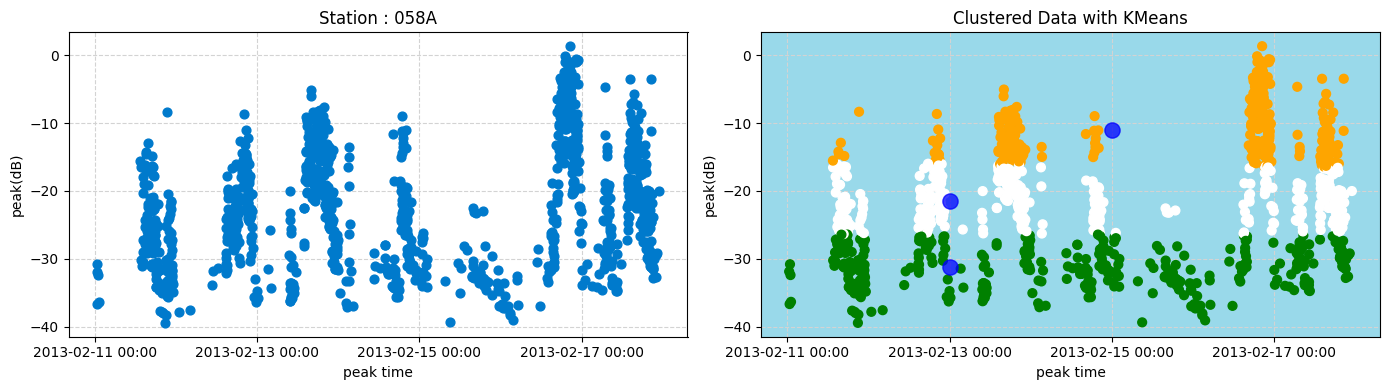

C:\Users\virag\AppData\Local\Temp\ipykernel_55472\1933628183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature1] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data[feature1]]


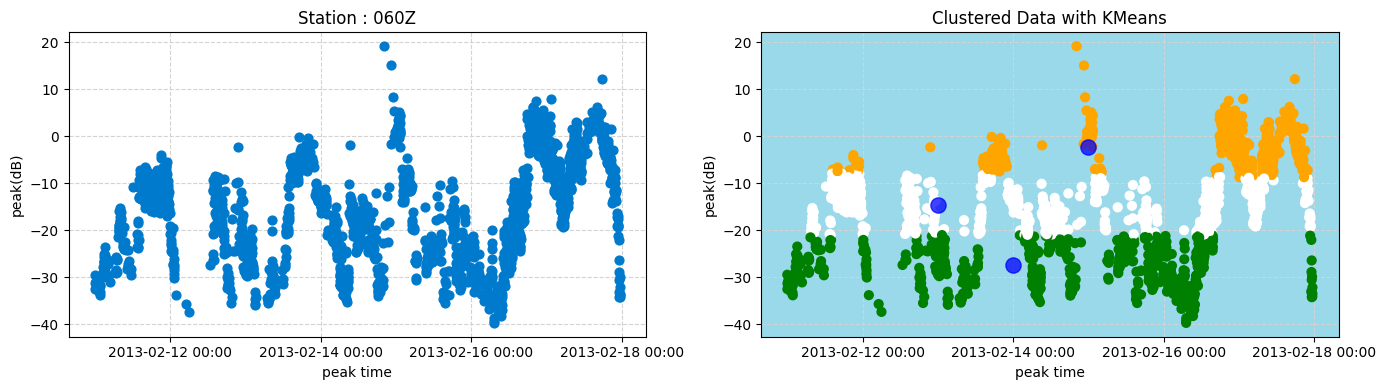

C:\Users\virag\AppData\Local\Temp\ipykernel_55472\1933628183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature1] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data[feature1]]


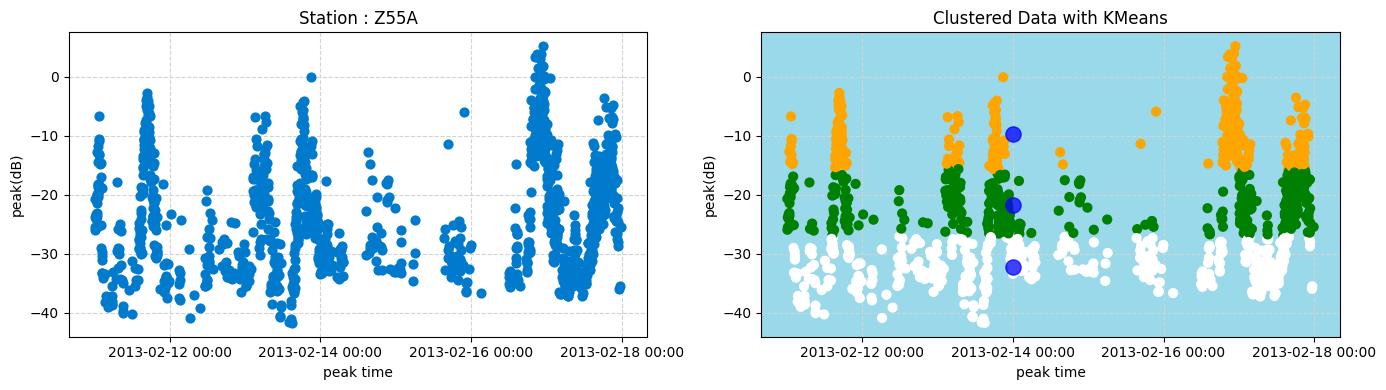

In [64]:
# Generates Scatter Plot
def generateScatterPlot(csvData, stations, feature1, feature2):
    
    csvRecords = csvData
    for station in stations:
        fig, axs = matplt.subplots(1, 2, figsize=(14, 4), layout="tight")
        plot1 = axs[0]
        plot2 = axs[1]

        # filtering data as per research station 
        data = csvRecords[csvRecords['station'] == station]
       
        # convert datetime string into datetime obj
        data[feature1] = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data[feature1]]
        dateOrdinal = data[feature1].map(pd.Timestamp.toordinal)

        # feature values
        f1Values = data[feature1]
        f2Vlaues = data[feature2]
        
        # scatter plot 1
        plot1.set_title('Station : ' + station)
        plot1.scatter(x= f1Values, y= f2Vlaues, c= '#007acc', s= 40)

        # generating clusters
        fillData = np.column_stack((dateOrdinal, f2Vlaues))
        kmeans = KMeans(n_clusters=3, random_state=2024)
        kmeans.fit(fillData)
        y_kmeans = kmeans.predict(fillData)

        # scatter plot 2
        # plotting the Clusters
        plot2.set_title('Clustered Data with KMeans')
        cmapIN = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange","green"])
        plot2.scatter(f1Values, f2Vlaues, c=y_kmeans, s=40, cmap= cmapIN)
        plot2.set_facecolor("#99D9EA")

        # plotting the centroids
        centroids = kmeans.cluster_centers_
        centroids_dates = [pd.Timestamp.fromordinal(int(c[0])) for c in centroids]
        plot2.scatter(centroids_dates, centroids[:, 1], c='b', s=120, alpha=0.75)
        
        # setting interval for x axis
        plot1.yaxis.set_major_locator(MultipleLocator(10))
        plot2.yaxis.set_major_locator(MultipleLocator(10))

        # setting interval for y axis
        plot1.xaxis.set_major_locator(mdates.HourLocator(byhour= 00))
        plot1.xaxis.set_major_locator(mdates.DayLocator(interval= 2))
        plot1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        plot2.xaxis.set_major_locator(mdates.HourLocator(byhour= 00))
        plot2.xaxis.set_major_locator(mdates.DayLocator(interval= 2))
        plot2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

        # adding dashed grid 
        plot1.set_axisbelow(True)
        plot1.grid(color='lightgray', linestyle='dashed')
        plot2.set_axisbelow(True)
        plot2.grid(color='lightgray', linestyle='dashed')

        # setting x & y labels
        plot1.set_xlabel(feature1)
        plot1.set_ylabel(feature2)
        plot2.set_xlabel(feature1)
        plot2.set_ylabel(feature2)

        matplt.show()

records = pd.read_csv('data/iris-event-list.csv')
stations = ['058A', '060Z', 'Z55A']
column1 = 'peak time'
column2 = 'peak(dB)'

generateScatterPlot(csvData= records, stations= stations, feature1= column1, feature2= column2)